In [81]:
# import library and load dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# load dataset
data = pd.read_csv('data.csv', delimiter=';')

# preprocess

# check if there is missing value
data.isnull().sum()

# encoding categorical variable
# Dropout -> 0, Enrolled -> 1, Graduate -> 1
data['Target'] = data['Target'].map({'Dropout': 0, 'Enrolled': 1, 'Graduate': 1})

# form features and target
X = data.drop(['Target'], axis=1)
y = data['Target']

# change column name Nacionality to Nationality
X.rename(columns={'Nacionality': 'Nationality'}, inplace=True)

# change Nationality value 1 to 1, all other to 0
X['Nationality'] = X['Nationality'].apply(lambda x: 1 if x == 1 else 0)

# drop Gender column to avoid discrimination
X = X.drop(['Gender'], axis=1)

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split dataset
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [82]:
# set n_components to 2 for scatter plot
# set n_components to 10 for feature selection
n_components = 2
pca = PCA(n_components=n_components)
X = pca.fit_transform(X)

In [83]:
# perform LOF outlier detection on X

from sklearn.neighbors import LocalOutlierFactor

# use contamination=auto to automatically detect the percentage of outliers
lof = LocalOutlierFactor(n_neighbors=20)
outliers1 = lof.fit_predict(X)

print(outliers1)

# count outliers
outliers1 = pd.Series(outliers1)
print(outliers1.value_counts())


[1 1 1 ... 1 1 1]
 1    4251
-1     173
Name: count, dtype: int64


In [84]:
# perform Isolation Forest, compare results

from sklearn.ensemble import IsolationForest

iforest = IsolationForest(contamination=0.02)
outliers2 = iforest.fit_predict(X)

print(outliers2)

# count outliers
outliers2 = pd.Series(outliers2)
print(outliers2.value_counts())

[1 1 1 ... 1 1 1]
 1    4335
-1      89
Name: count, dtype: int64


In [85]:
# perform Elliptic Envelope

from sklearn.covariance import EllipticEnvelope

ee = EllipticEnvelope(contamination=0.02)
outliers3 = ee.fit_predict(X)

print(outliers3)

# count outliers
outliers3 = pd.Series(outliers3)
print(outliers3.value_counts())


[1 1 1 ... 1 1 1]
 1    4335
-1      89
Name: count, dtype: int64


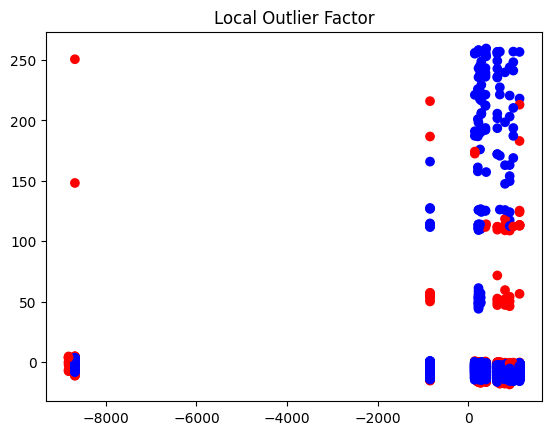

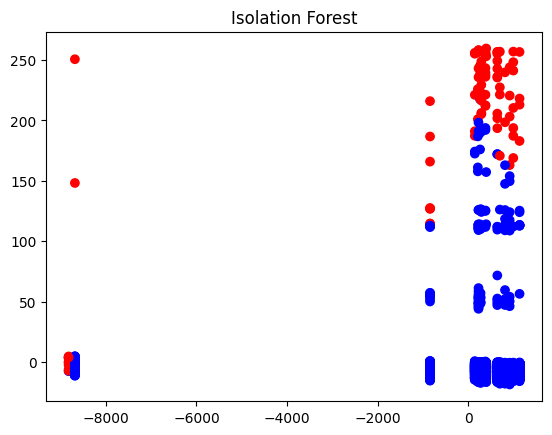

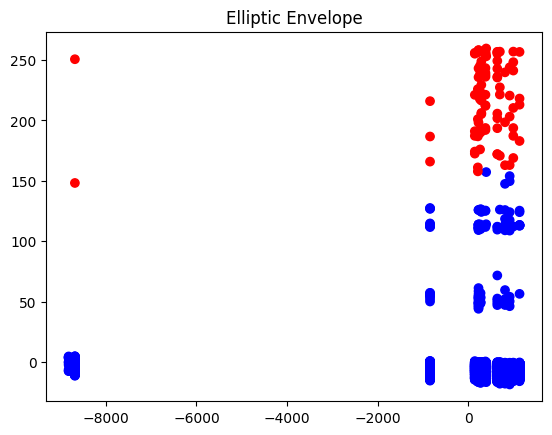

In [86]:
# plot scatter of X_pca, color by outliers


import matplotlib.pyplot as plt

if n_components == 2:
    colors = ['red' if x == -1 else 'blue' for x in outliers1]
    plt.scatter(X[:, 0], X[:, 1], c=colors)
    plt.title('Local Outlier Factor')
    plt.show()

    # value 1 blue, value -1 red
    colors = ['red' if x == -1 else 'blue' for x in outliers2]
    plt.scatter(X[:, 0], X[:, 1], c=colors)
    plt.title('Isolation Forest')
    plt.show()

    colors = ['red' if x == -1 else 'blue' for x in outliers3]
    plt.scatter(X[:, 0], X[:, 1], c=colors)
    plt.title('Elliptic Envelope')
    plt.show()

if n_components==3:
    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    colors = ['red' if x == -1 else 'blue' for x in outliers1]
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=colors)
    plt.title('Local Outlier Factor')
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    colors = ['red' if x == -1 else 'blue' for x in outliers2]
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=colors)
    plt.title('Isolation Forest')
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    colors = ['red' if x == -1 else 'blue' for x in outliers3]
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=colors)
    plt.title('Elliptic Envelope')
    plt.show()


